In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
import numpy as np

In [ ]:
def car_color(car_path):
    car_image = img.imread(car_path)

    r, g, b = [], [], []

    for row in car_image:
        for temp_r, temp_g, temp_b in row:
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)

    colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g,
                              'scaled_red': whiten(r), 'scaled_blue': whiten(b), 'scaled_green': whiten(g)})

    r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

    colors = []

    n_cluster = 3
    cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)

    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))

    colors2 = np.array(colors)

    print(list(colors))
    print(list(colors2))

    plt.imshow(car_image)
    plt.show()

    plt.imshow([colors])
    plt.show()

    has_one = np.any(colors2 > 1, axis=1)

    for i, row_has_one in enumerate(has_one):
        if row_has_one:
            maxi = np.max(colors2, axis = 1).reshape(-1, 1)
            colors2[i] = colors2[i] * (255 / maxi[i])
        else:
            colors2[i] = colors2[i] * 255

    for i in range(0, n_cluster):
        colors[i] = colors2[i].astype('int').tolist()

    print(list(colors))
    print(list(colors2))

    plt.imshow(car_image)
    plt.show()

    plt.imshow([colors])
    plt.show()

[(0.3573906742015914, 0.360358445424678, 0.2697659941368874), (0.6642207798695283, 0.49373035326727394, 0.3640636725432145), (0.6754605873802403, 0.7042859981506898, 0.5526609523358473)]
[array([0.35739067, 0.36035845, 0.26976599]), array([0.66422078, 0.49373035, 0.36406367]), array([0.67546059, 0.704286  , 0.55266095])]


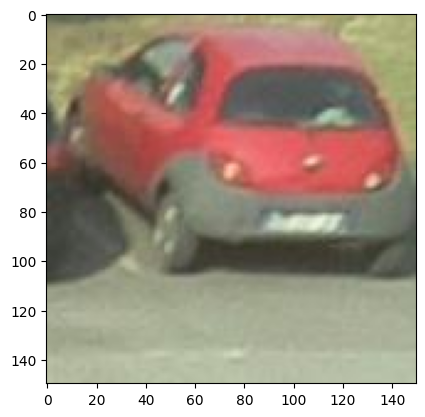

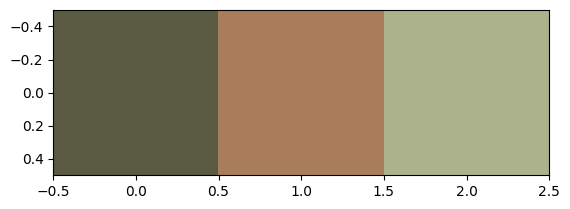

[[91, 91, 68], [169, 125, 92], [172, 179, 140]]
[array([91.13462192, 91.89140358, 68.7903285 ]), array([169.37629887, 125.90124008,  92.8362365 ]), array([172.24244978, 179.59292953, 140.92854285])]


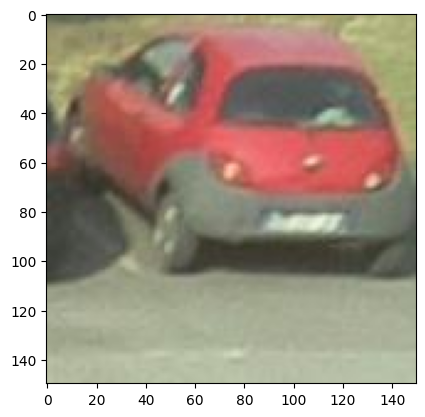

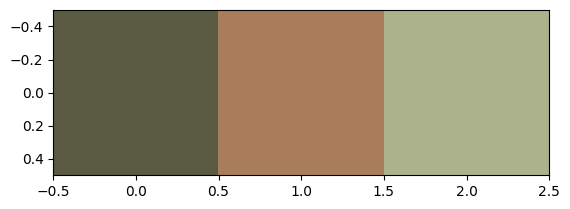

In [ ]:
car_color('/content/20150703_0850_16.jpg')

The biggest cluster is cluster 0 with 6935 points.


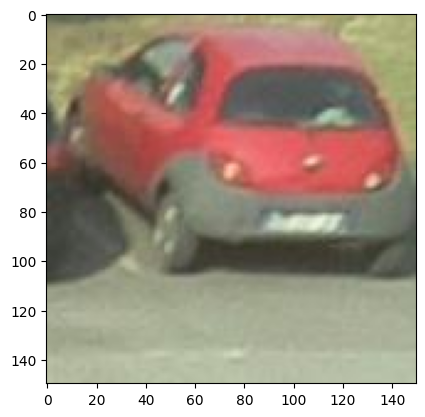

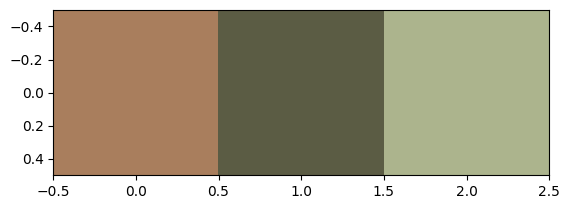

[[0.6654944073497286, 0.49692883424329914, 0.3670779767781719], [0.3599351565780554, 0.36107596937216724, 0.27023889547761193], [0.6759519086403032, 0.7060335863721872, 0.5539869549193916]]


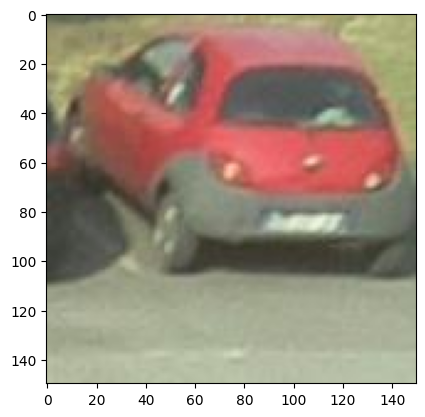

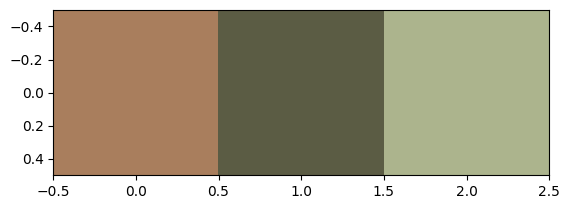

[[169, 126, 93], [91, 92, 68], [172, 180, 141]]


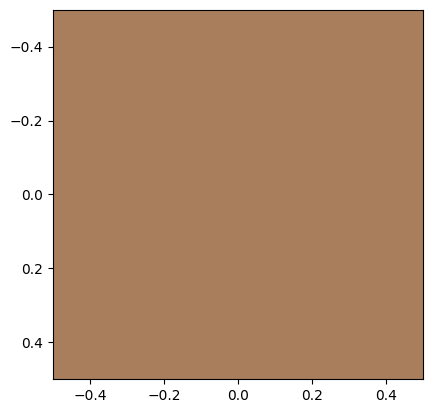

In [ ]:
car_path = '/content/20150703_0850_16.jpg'
car_image = img.imread(car_path)
# height, width, _ = car_image.shape
# car_image = car_image[:height-20, :]

# Flatten the image array and separate the color channels
pixels = car_image.reshape(-1, 3)
r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]

# Create a DataFrame and whiten the color values
colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
colors_df['scaled_red'] = whiten(r)
colors_df['scaled_blue'] = whiten(b)
colors_df['scaled_green'] = whiten(g)

r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

# Perform k-means clustering
n_cluster = 3
cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)

cluster_labels, _ = vq(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], cluster_centers)
counts = np.bincount(cluster_labels)

# Identify the biggest cluster
sorted_indices = np.argsort(counts)[::-1]
second_largest_cluster_index = sorted_indices[1]
second_largest_cluster_size = counts[second_largest_cluster_index]

print(f"The biggest cluster is cluster {second_largest_cluster_index} with {second_largest_cluster_size} points.")

# Convert scaled cluster centers back to original color values
colors = (cluster_centers * [r_std, g_std, b_std] / 255).tolist()

plt.imshow(car_image)
plt.show()

plt.imshow([colors])
plt.show()

print(list(colors))

colors = np.clip(colors, 0, 1) * 255
colors = np.array(colors).astype(int).tolist()

plt.imshow(car_image)
plt.show()
plt.imshow([colors])
plt.show()

print(list(colors))

plt.imshow([[colors[second_largest_cluster_index]]])
plt.show()

In [ ]:
def kmeans_n_clusters():
    distortions = []
    num_clusters = range(1, 10)
    for i in num_clusters:
        cluster_centers, distortion = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
        distortions.append(distortion)

    elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

    sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
    plt.xticks(num_clusters)
    plt.show()

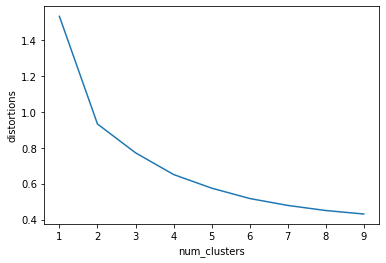

In [ ]:
kmeans_n_clusters()

In [ ]:
car_image = img.imread('3.jpg')
print(car_image.shape)

(150, 150, 3)


In [ ]:
r = []
g = []
b = []

In [ ]:
for row in car_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [ ]:
distortions = []
num_clusters = range(1, 10)

In [ ]:
colors_df = pd.DataFrame(columns = ['red', 'blue', 'green', 'scaled_red', 'scaled_blue', 'scaled_green'])

In [ ]:
colors_df['red'] = r

In [ ]:
colors_df['blue'] = b

In [ ]:
colors_df['green'] = g

In [ ]:
colors_df['scaled_red'] = whiten(r)

In [ ]:
colors_df['scaled_blue'] = whiten(b)

In [ ]:
colors_df['scaled_green'] = whiten(g)

In [ ]:
colors_df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,-84,-125,-100,5.161377,3.161802,4.553254
1,-87,-128,-103,5.071353,3.089395,4.465692
2,-92,123,-108,4.921313,2.968715,4.319754
3,-97,118,-113,4.771273,2.848036,4.173816
4,-97,119,-111,4.771273,2.872172,4.232191


In [ ]:
for i in num_clusters:
    cluster_centers, distortion = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

In [ ]:
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

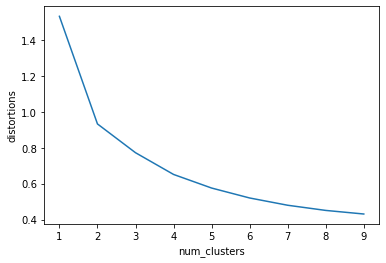

In [ ]:
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

In [ ]:
colors = []

In [ ]:
n_cluster = 3
cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)

In [ ]:
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))

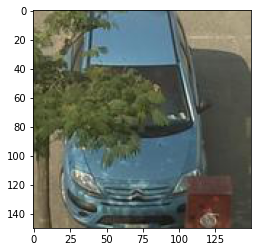

In [ ]:
plt.imshow(car_image)
plt.show()

In [ ]:
colors2 = np.array(colors)

In [ ]:
colors2 = colors2 * 255 / 2

In [ ]:
colors2[0]

array([72.05031587, 61.52807603, 86.84239237])

In [ ]:
for i in range(0, n_cluster):
    colors[i] = colors2[i].astype('int').tolist()

In [ ]:
list(colors)

[[72, 61, 86], [155, 134, 175], [96, 135, 142]]

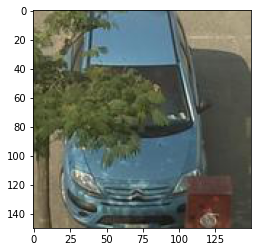

In [ ]:
plt.imshow(car_image)
plt.show()

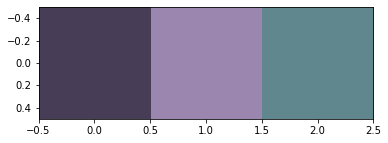

In [ ]:
plt.imshow([colors])
plt.show()

[[1.02589226 1.01183413 0.70420857]
 [0.61738106 0.66924165 0.44098499]
 [0.30542577 0.30400017 0.208765  ]]


[[255.         251.50565485 175.040978  ]
 [157.43216968 170.65662038 112.45117225]
 [ 77.88357128  77.52004301  53.23507475]]

[[255, 251, 175], [157, 170, 112], [77, 77, 53]]


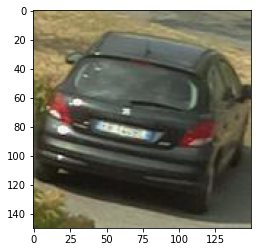

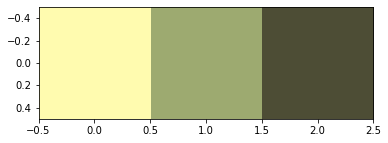

In [ ]:
car_image = img.imread('7.jpg')

r, g, b = [], [], []

for row in car_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g,
                        'scaled_red': whiten(r), 'scaled_blue': whiten(b), 'scaled_green': whiten(g)})

r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

colors = []

n_cluster = 3
cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255, scaled_g * g_std / 255, scaled_b * b_std / 255))

colors2 = np.array(colors)

print(colors2)

print()

# for i in range(n_cluster):
#     if np.any(np.sum(colors2 > 1, axis=1)):
#         maxi = np.max(colors2, axis = 1).reshape(-1, 1)
#         colors2[i] = colors2[i] * (255 / maxi[i])

#     else:
#         colors2[i] = colors2[i] * 255

has_one = np.any(colors2 > 1, axis=1)

for i, row_has_one in enumerate(has_one):
    if row_has_one:
        maxi = np.max(colors2, axis = 1).reshape(-1, 1)
        colors2[i] = colors2[i] * (255 / maxi[i])
    else:
        colors2[i] = colors2[i] * 255


print()
print(colors2)

for i in range(n_cluster):
    colors[i] = colors2[i].astype('int').tolist()

print()
print(list(colors))

plt.imshow(car_image)
plt.show()

plt.imshow([colors])
plt.show()

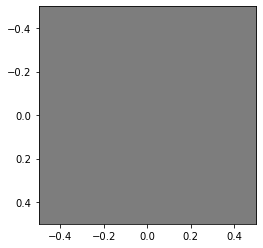

In [ ]:
plt.imshow([[[125, 125, 125]]])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


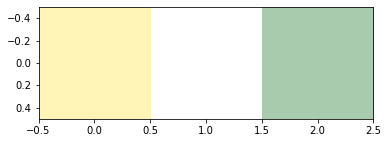

In [ ]:
plt.imshow([colors])
plt.show()

In [ ]:
colors[0]

[186, 122, 91]

In [ ]:
maxi = 255 / np.max(colors, axis = 1).reshape(-1, 1)

In [ ]:
cluster_centers

array([[4.05078132, 4.48946347, 4.37617761],
       [1.61640535, 1.88990902, 1.82143334],
       [2.92434766, 2.83785009, 3.0089692 ]])

In [ ]:
colors[0]

(0.9280985932876039, 0.8156971333233041, 0.735174481418635)

In [ ]:
colors[0] = list((colors[0] * maxi[0]).astype('int'))
colors[1] = list((colors[1] * maxi[1]).astype('int'))
colors[2] = list((colors[2] * maxi[2]).astype('int'))

In [ ]:
maxi_matrix

array([[320.56801213, 178.22237808, 174.33120327],
       [320.56801213, 178.22237808, 174.33120327],
       [320.56801213, 178.22237808, 174.33120327]])

In [ ]:
maxi_matrix = np.row_stack([maxi, maxi, maxi])

In [ ]:
maxi

array([320.56801213, 178.22237808, 174.33120327])

In [ ]:
np.sum(colors, axis=0)

array([10.81333044, 10.87093823,  9.06242523])

In [ ]:
import numpy as np

def process_rows(arr):
    # Check if any element in any row has the value of 1
    has_one = np.any(arr == 1, axis=1)

    # Perform different actions based on the condition
    for i, row_has_one in enumerate(has_one):
        if row_has_one:
            print(f"Row {i+1} contains the value 1: {arr[i]}")
            # Add your specific actions for rows containing the value 1 here
        else:
            print(f"Row {i+1} does not contain the value 1: {arr[i]}")
            # Add your specific actions for rows not containing the value 1 here

# Example usage
array = np.array([[0, 1, 2],
                  [3, 4, 5],
                  [6, 7, 8],
                  [1, 2, 3]])

process_rows(array)


Row 1 contains the value 1: [0 1 2]
Row 2 does not contain the value 1: [3 4 5]
Row 3 does not contain the value 1: [6 7 8]
Row 4 contains the value 1: [1 2 3]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
import matplotlib.image as img


def car_color(car_path):
    car_image = img.imread(car_path)

    # Reshape and convert to float for faster operations
    pixels = car_image.reshape(-1, 3).astype(np.float64)

    # Whiten color values directly in-place (avoid DataFrame creation)
    pixels[:, 0] = whiten(pixels[:, 0])
    pixels[:, 1] = whiten(pixels[:, 1])
    pixels[:, 2] = whiten(pixels[:, 2])

    # Calculate standard deviation directly from the array (no DataFrame needed)
    r_std, g_std, b_std = pixels.std(axis=0)

    # Perform k-means clustering directly on the array
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(pixels)
    cluster_centers = kmeans.cluster_centers_

    # Convert scaled centers to original colors (avoid list conversions)
    colors = (cluster_centers * np.array([r_std, g_std, b_std]) / 255)
    colors = np.clip(colors, 0, 1) * 255
    # colors = colors.astype(int).tolist()

    return colors

In [ ]:
colors = car_color('/content/test0.jpg')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


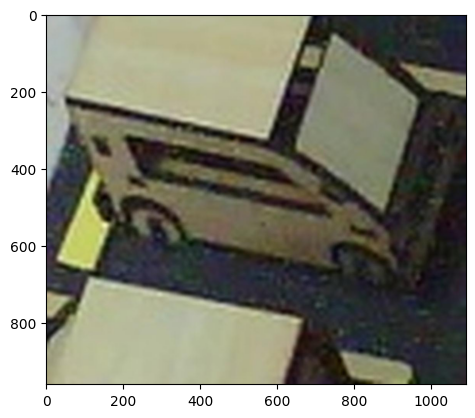

[[2.65857976 2.62027957 2.69716493]
 [0.82732839 0.77868695 0.88540034]]


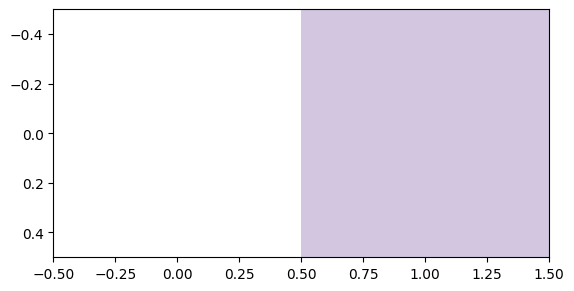

In [ ]:
car_image = img.imread('/content/test0.jpg')
plt.imshow(car_image)
plt.show()
print(colors)
plt.imshow([colors])
plt.show()

In [ ]:
import pandas as pd

In [ ]:
def car_color2(car_path):
    car_image = img.imread(car_path)
    # height, width, _ = car_image.shape
    # car_image = car_image[:height-20, 20:width-20]

    # Flatten the image array and separate the color channels
    pixels = car_image.reshape(-1, 3)
    r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]

    # Create a DataFrame and whiten the color values
    colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
    colors_df['scaled_red'] = whiten(r)
    colors_df['scaled_blue'] = whiten(b)
    colors_df['scaled_green'] = whiten(g)

    r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

    # Perform k-means clustering
    n_cluster = 4
    cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)

    # Convert scaled cluster centers back to original color values
    colors = (cluster_centers * [r_std, g_std, b_std] / 255).tolist()
    colors = np.clip(colors, 0, 1) * 255
    colors = np.array(colors).astype(int).tolist()

    return colors

In [ ]:
for i in range(9):
  colors = car_color2('/content/test' + str(i) + '.jpg')
  car_image = img.imread('/content/test' + str(i) + '.jpg')
  plt.imshow(car_image)
  plt.show()
  print(colors)
  plt.imshow([colors])
  plt.show()

In [ ]:
car_image = img.imread('/content/test2.jpg')
height, width, _ = car_image.shape
car_image = car_image[:height-30, 30:width-20]
plt.imshow(car_image)
plt.show()
print(colors)
plt.imshow([colors])
plt.show()

In [ ]:
def kmeans_n_clusters():
    distortions = []
    num_clusters = range(1, 10)
    for i in num_clusters:
        cluster_centers, distortion = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
        distortions.append(distortion)

    elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

    sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
    plt.xticks(num_clusters)
    plt.show()

In [ ]:
for yarab in range(9):
  car_path = '/content/test' + str(yarab) + '.jpg'
  car_image = img.imread(car_path)
  height, width, _ = car_image.shape
  car_image = car_image[:height-20, 20:width-20]

  # Flatten the image array and separate the color channels
  pixels = car_image.reshape(-1, 3)
  r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]

  # Create a DataFrame and whiten the color values
  colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
  colors_df['scaled_red'] = whiten(r)
  colors_df['scaled_blue'] = whiten(b)
  colors_df['scaled_green'] = whiten(g)

  r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

  # Perform k-means clustering
  n_cluster = 2
  cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)
  cluster_labels, _ = vq(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], cluster_centers)

  counts = np.bincount(cluster_labels)
  # Identify the biggest cluster
  sorted_indices = np.argsort(counts)[::-1]
  second_largest_cluster_index = sorted_indices[1]
  second_largest_cluster_size = counts[second_largest_cluster_index]

  print(f"The biggest cluster is cluster {second_largest_cluster_index} with {second_largest_cluster_size} points.")

  # Convert scaled cluster centers back to original color values
  colors = (cluster_centers * [r_std, g_std, b_std] / 255).tolist()
  colors = np.clip(colors, 0, 1) * 255
  colors = np.array(colors).astype(int).tolist()

  plt.imshow(car_image)
  plt.show()
  plt.imshow([colors])
  plt.show()
  plt.imshow([[colors[second_largest_cluster_index]]])
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
import numpy as np

The biggest cluster is cluster 1 with 1416 points.


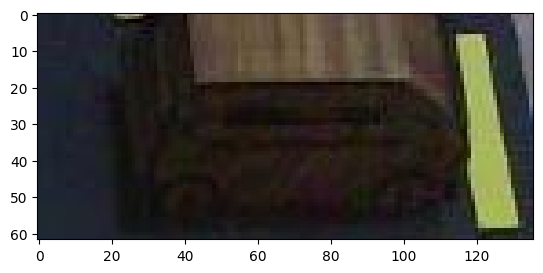

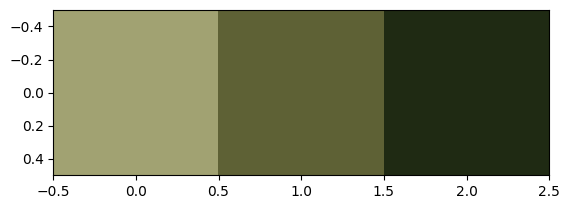

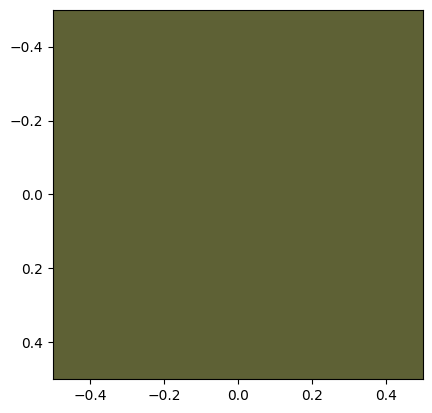

In [ ]:
car_path = '/content/test8.jpg'
car_image = img.imread(car_path)
height, width, _ = car_image.shape
car_image = car_image[:height-20, :]

# Flatten the image array and separate the color channels
pixels = car_image.reshape(-1, 3)
r, g, b = pixels[:, 0], pixels[:, 1], pixels[:, 2]

# Create a DataFrame and whiten the color values
colors_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
colors_df['scaled_red'] = whiten(r)
colors_df['scaled_blue'] = whiten(b)
colors_df['scaled_green'] = whiten(g)

  # distortions = []
  # num_clusters = range(1, 10)
  # for i in num_clusters:
  #     cluster_centers, distortion = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
  #     distortions.append(distortion)

  # elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

  # sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
  # plt.xticks(num_clusters)
  # plt.show()

r_std, g_std, b_std = colors_df[['red', 'green', 'blue']].std()

  # Perform k-means clustering
n_cluster = 3
cluster_centers, _ = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], n_cluster)
cluster_labels, _ = vq(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], cluster_centers)

counts = np.bincount(cluster_labels)
  # Identify the biggest cluster
sorted_indices = np.argsort(counts)[::-1]
second_largest_cluster_index = sorted_indices[1]
second_largest_cluster_size = counts[second_largest_cluster_index]

print(f"The biggest cluster is cluster {second_largest_cluster_index} with {second_largest_cluster_size} points.")

  # Convert scaled cluster centers back to original color values
colors = (cluster_centers * [r_std, g_std, b_std] / 255).tolist()
colors = np.clip(colors, 0, 1) * 255
colors = np.array(colors).astype(int).tolist()

plt.imshow(car_image)
plt.show()
plt.imshow([colors])
plt.show()
plt.imshow([[colors[second_largest_cluster_index]]])
plt.show()

In [ ]:
def kmeans_n_clusters():
    distortions = []
    num_clusters = range(1, 10)
    for i in num_clusters:
        cluster_centers, distortion = kmeans(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
        distortions.append(distortion)

    elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

    sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
    plt.xticks(num_clusters)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

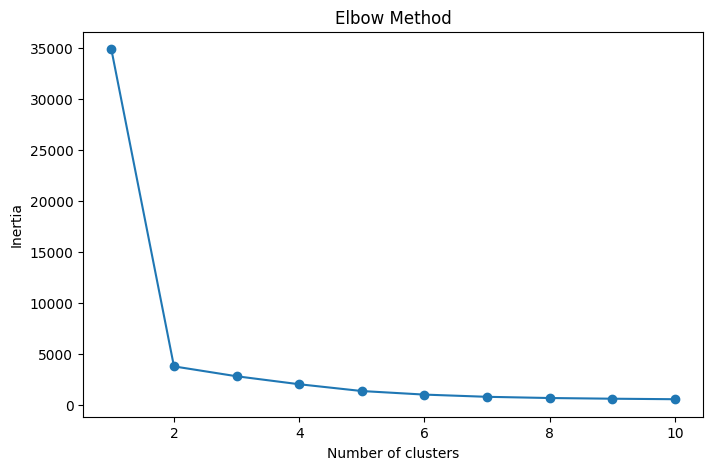

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

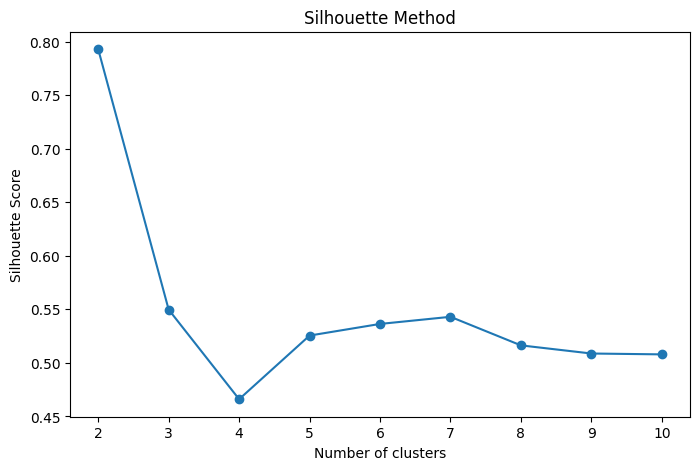

The optimal number of clusters based on the silhouette score is: 2


2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data for example

# Elbow Method
def elbow_method(X, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Silhouette Score Method
def silhouette_method(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):  # Silhouette score is not defined for k=1
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

    best_k = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
    return best_k

# Determine the optimal number of clusters
def optimal_k(X, max_k=10):
    elbow_method(X, max_k)
    best_k = silhouette_method(X, max_k)
    print(f"The optimal number of clusters based on the silhouette score is: {best_k}")
    return best_k

# Example usage
optimal_k(colors_df[['scaled_red', 'scaled_blue', 'scaled_green']], max_k=10)
